# diagnostic_plots.ipynb

Making plots of Butterpy output to test relationships between activity_level, number of spots, latitude range, spot flux, etc.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
# Read in data
x = pd.read_csv("diagnostics.csv", index_col=0, skipinitialspace=True)

if (x.nspots == 0).any():
    x["nspots"] = x.eval("1 + nspots") # so log plots don't break
    nlabel = "N Spots + 1"

    # What models have zero spots?
    xs = x.query("nspots == 1")
    print(
        f"Models with zero spots have:\n"
        f"max activity level: {xs.act.max():.2f}*Sun,\n"
        f"min cycle period: {xs.tcyc.min():.2f} yr")
    
else:
    nlabel = "N Spots"

So already we see that the zero-spot models have low activity levels and/or long cycle periods. So either they don't get active enough to produce spots within a year, or they don't get active *soon* enough to do so.

## Variations with activity_level

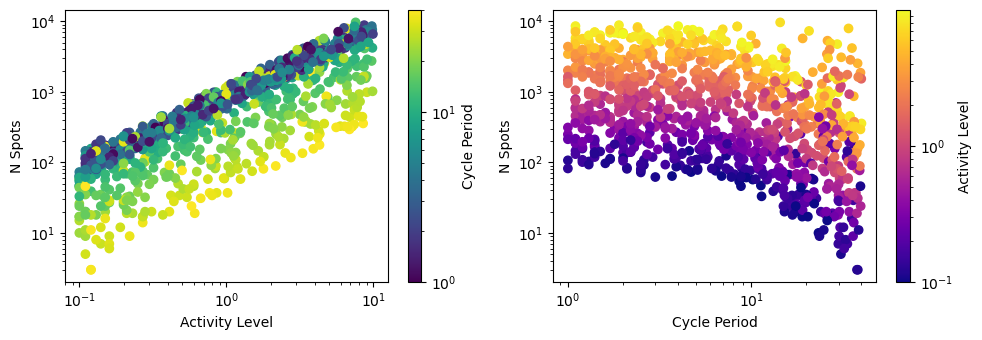

In [3]:
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3.5))

im1 = ax1.scatter("act", "nspots", c="tcyc", data=x, norm=LogNorm())
fig1.colorbar(im1, label="Cycle Period", ax=ax1)
ax1.set(xlabel="Activity Level", ylabel=nlabel, xscale="log", yscale="log")

im2 = ax2.scatter("tcyc", "nspots", c="act", data=x, norm=LogNorm(), cmap="plasma")
fig1.colorbar(im2, label="Activity Level", ax=ax2)
ax2.set(xlabel="Cycle Period", ylabel=nlabel, xscale="log", yscale="log")

fig1.tight_layout()

*Left:* Activity Level very clearly sets the maximum number of spots, but a range of spots can emerge at fixed Activity Level. Unsurprisingly, stars with longer cycle periods emerge fewer spots.

*Right:* Here Cycle Period sets the minimum number of spots that can emerge, at least up to $T_\mathrm{cyc}$ = 10 yr.

**Note** that this behavior may change for longer runs. The shortest cycle period is 1 year, and that's the length of the spot emergence simulation. I'll need to run spot emergence for longer for a small sample, at least for the duration of the longest cycles.

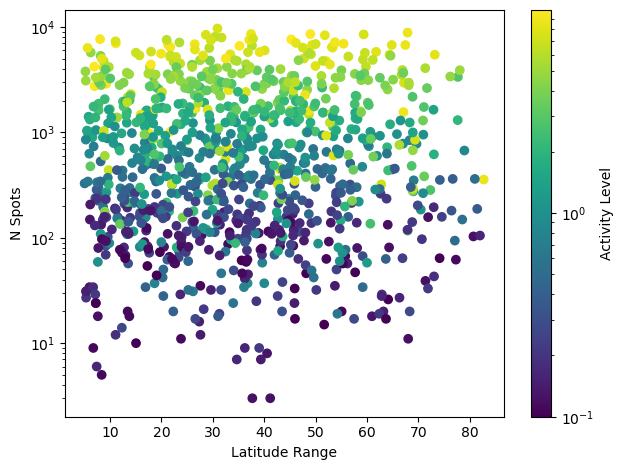

In [4]:
fig2, ax3 = plt.subplots()
im3 = ax3.scatter("range", "nspots", c="act", data=x, norm=LogNorm())
fig2.colorbar(im3, label="Activity Level", ax=ax3)
ax3.set(xlabel="Latitude Range", ylabel=nlabel, yscale="log")
fig2.tight_layout()

The number of spots emerged doesn't seem to care about the latitude range. So the activity level sets the number of spots emerged at the cycle maximum, and *not* per unit surface area (I feel like that it was described that way in text or comments somewhere, but I can't find it.)

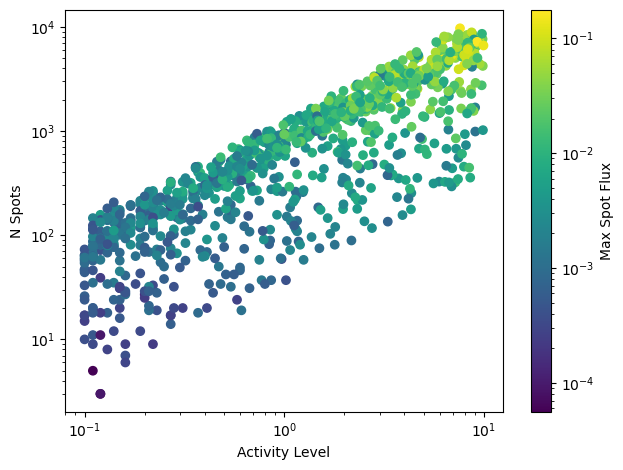

In [5]:
fig3, ax4 = plt.subplots()
im4 = ax4.scatter("act", "nspots", c="fmax", data=x, norm=LogNorm())
fig3.colorbar(im4, label="Max Spot Flux", ax=ax4)
ax4.set(xlabel="Activity Level", ylabel=nlabel, xscale="log", yscale="log")
fig3.tight_layout()

Now looking at the maximum light curve flux modulation, the spot flux is the same across N_spots for all activity levels, with higher spot flux resulting from more spots. That's not surprising. Let's view this another way.

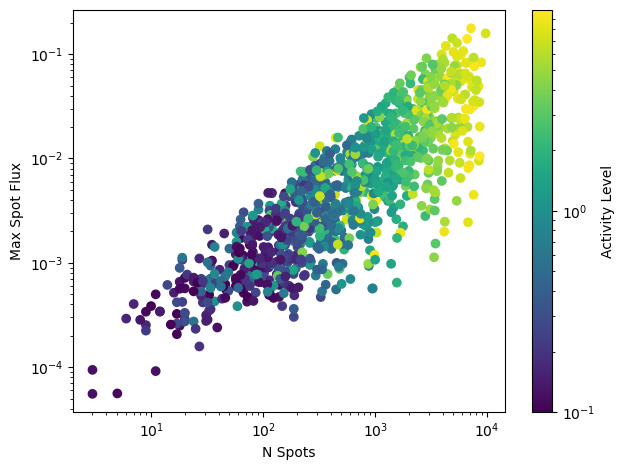

In [6]:
fig4, ax5 = plt.subplots()
im5 = ax5.scatter("nspots", "fmax", c="act", data=x, norm=LogNorm())
fig4.colorbar(im5, label="Activity Level", ax=ax5)
ax5.set(xlabel=nlabel, ylabel="Max Spot Flux", xscale="log", yscale="log")
fig4.tight_layout()

The maximum spot flux is pretty much entirely set by the number of spots. The spot flux reaches ~10% for the highest activity level (10 x Solar), which is about the highest we see in nature. The maximum spot flux from light curves with a single spot ranges from 5 ppm (5e-6) to 100 ppm (1e-4), and that will just be proportional to the area/field strength of the spot.

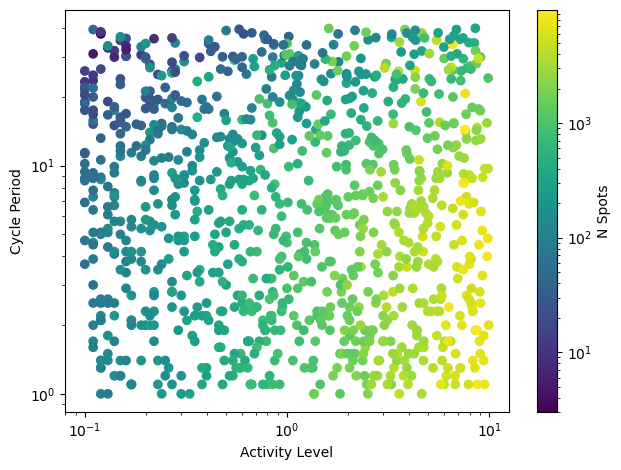

In [7]:
fig5, ax6 = plt.subplots()
im6 = ax6.scatter("act", "tcyc", c="nspots", data=x, norm=LogNorm())
fig5.colorbar(im6, label=nlabel, ax=ax6)
ax6.set(xlabel="Activity Level", ylabel="Cycle Period", xscale="log", yscale="log")
fig5.tight_layout()

Another view, now with the actual independent variables on the x- and y-axes. N spots increases with activity level, but also with decreasing cycle period because not enough time elapses to complete a full cycle.

With longer light curves, there should be no more variability with cycle period as long as cycle_period < duration of light curve.